In [1]:
import numpy as np
from scipy import stats

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Data: I_1, I_2, ..., I_n i.i.d. Bernoulli(p)
# S = observed number of successes; distribution binomial (n, p)
# X = observed proportion of successes 
# Simulate X, number of times = repetitions
# Use each simulation to construct and display a
# level% normal confidence interval for p


def conf_int_p(n, p, level=95, repetitions=50):
    alpha = (100 - level) / 100
    z_left = stats.norm.ppf(alpha/2)
    z_right = stats.norm.ppf(1 - alpha/2)

    obs_S = stats.binom.rvs(n, p, size=repetitions)
    obs_X = obs_S / n
    est_sds = (obs_X * (1- obs_X) / n) ** 0.5

    left_ends = obs_X + z_left * est_sds
    right_ends = obs_X + z_right * est_sds

    num_good = np.count_nonzero((left_ends < p)*(right_ends > p))
    prop_good = num_good / repetitions

    plt.figure(figsize=(7, 7))
    for i in np.arange(repetitions):
        if left_ends[i] < p < right_ends[i]:
            plt.plot([left_ends[i], right_ends[i]], [(i+1)/10, (i+1)/10], color='darkblue', lw=2)
            plt.scatter(obs_X[i], (i+1)/10, color='darkblue', s=20)
        else:
            plt.plot([left_ends[i], right_ends[i]], [(i+1)/10, (i+1)/10], color='red', lw=2)
            plt.scatter(obs_X[i], (i+1)/10, color='red', s=20)
    plt.plot([p, p], [0, repetitions*0.1], color='gold', lw=2)
    plt.scatter(p, 0, color='gold', s=30, zorder=3)
    plt.plot([0, 1], [0, 0], color='k', lw=1)
    plt.xlim(0, 1.01)
    plt.yticks([], [])
    print('Normal approximate', level, 'percent confidence intervals for p')
    print('based on', repetitions, 'independent samples of', n, 'i.i.d. Bernoulli (p) trials')
    print('Gold vertical line is at p')
    print('Proportion of good intervals =', prop_good)

In [3]:
def closer_to_reality(n, level=95, repetitions=50):
    p = 0.25
    alpha = (100 - level) / 100
    z_left = stats.norm.ppf(alpha/2)
    z_right = stats.norm.ppf(1 - alpha/2)

    obs_S = stats.binom.rvs(n, p, size=repetitions)
    obs_X = obs_S / n
    est_sds = (obs_X * (1- obs_X) / n) ** 0.5

    left_ends = obs_X + z_left * est_sds
    right_ends = obs_X + z_right * est_sds

    plt.figure(figsize=(7, 7))
    for i in np.arange(repetitions):
            plt.plot([left_ends[i], right_ends[i]], [(i+1)/10, (i+1)/10], color='darkblue', lw=2)
            plt.scatter(obs_X[i], (i+1)/10, color='darkblue', s=20)
    plt.plot([0, 1], [0, 0], color='k', lw=1)
    plt.xlim(0, 1.01)
    plt.yticks([], [])
    print('Normal approximate', level, 'percent confidence intervals for p')
    print('based on', repetitions, 'independent samples of', n, 'i.i.d. Bernoulli (p) trials')

In [4]:
def reality(n, level=95):
    p = 0.25
    alpha = (100 - level) / 100
    z_left = stats.norm.ppf(alpha/2)
    z_right = stats.norm.ppf(1 - alpha/2)

    obs_S = stats.binom.rvs(n, p)
    obs_X = obs_S / n
    est_sd = (obs_X * (1- obs_X) / n) ** 0.5

    left_end = obs_X + z_left * est_sd
    right_end = obs_X + z_right * est_sd

    plt.figure(figsize=(7, 3))
    plt.plot([left_end, right_end], [1/10, 1/10], color='darkblue', lw=2)
    plt.scatter(obs_X, 1/10, color='darkblue', s=20)
    plt.plot([0, 1], [0, 0], color='k', lw=1)
    plt.xlim(0, 1.01)
    plt.ylim(-0.01, 1)
    plt.yticks([], [])
    print('Normal approximate', level, 'percent confidence interval for p')
    print('based on one sample of', n, 'i.i.d. Bernoulli (p) trials')

In [5]:
def bb_credible_int(r, s, num_heads, n, level=95):
    alpha = (100 - level)/100
    p = stats.beta.rvs(r, s)
    post_r = r + num_heads
    post_s = r + n - num_heads
    x = np.arange(0, 1.01, 0.01)
    prior = stats.beta.pdf(x, r, s)
    posterior = stats.beta.pdf(x, post_r, post_s)
    plt.plot([0, 1], [0, 0], color='grey', lw=1)
    plt.plot(x, prior, color='darkblue', lw=2, label='Prior')
    plt.scatter(r/(r+s), -0.1, marker='^', color='darkblue')
    plt.scatter(num_heads/n, 0, color='green', s=40)
    plt.plot(x, posterior, color='green', lw=2, label='Posterior')
    left_end = stats.beta.ppf(alpha/2, post_r, post_s)
    right_end = stats.beta.ppf(1-(alpha/2), post_r, post_s)
    plt.plot([left_end, right_end], [0, 0], color='green', lw=3)
    plt.legend()
    plt.title(str(level)+'% Credible Interval')

In [6]:
def bb_credible_int_construction(r, s, n, level=95):
    alpha = (100 - level)/100
    p = stats.beta.rvs(r, s)
    num_heads = stats.binom.rvs(n, p)
    post_r = r + num_heads
    post_s = r + n - num_heads
    x = np.arange(0, 1.01, 0.01)
    prior = stats.beta.pdf(x, r, s)
    posterior = stats.beta.pdf(x, post_r, post_s)
    
    plt.plot([0, 1], [0, 0], color='grey', lw=1)
    plt.plot(x, prior, color='darkblue', lw=2, label='Prior')
    plt.scatter(r/(r+s), -0.1, marker='^', color='darkblue')
    plt.scatter(num_heads/n, 0, color='green', s=40)
    plt.plot(x, posterior, color='green', lw=2, label='Posterior')
    
    left_end = stats.beta.ppf(alpha/2, post_r, post_s)
    right_end = stats.beta.ppf(1-(alpha/2), post_r, post_s)
    plt.plot([left_end, right_end], [0, 0], color='green', lw=3)
    plt.legend()
    plt.scatter(p, 0, color='darkblue', s=40, zorder=3)

    x_int = np.arange(left_end, right_end+0.01, 0.01)
    y_int = stats.beta.pdf(x_int, post_r, post_s)
    plt.fill_between(x_int, y_int, color='green', alpha=0.1)
    
    x_left = np.arange(0, left_end+0.01, 0.01)
    y_left = stats.beta.pdf(x_left, post_r, post_s)
    plt.fill_between(x_left, y_left, color='gold')
    
    x_right = np.arange(right_end, 1.01, 0.01)
    y_right = stats.beta.pdf(x_right, post_r, post_s)
    plt.fill_between(x_right, y_right, color='gold')
    
    plt.title('Each Gold Area = '+str((100-level)/2)+'%', fontsize=15)
    plt.legend()

# Confidence and Credibility #

### DS 102 Lecture 11, 10/3/2109 ###

## 1. Review of Confidence Interval for Proportion ##

- Fixed parameter $p \in (0, 1)$
- Data: $Y$ is binomial $(n, p)$
- Estimate: Sample proportion $\hat{p} = Y/n = \hat{p}_{MLE}$

When $n$ is large, the CLT says

$$
P(\hat{p} \in p \pm 1.96\sqrt{p(1-p)/n}) ~ \approx ~ 0.95
$$
So
$$
P(p \in \hat{p} \pm 1.96\sqrt{p(1-p)/n}) ~ \approx ~ 0.95
$$

But we don't know $p$ so can't compute the width of the interval. 

Solution: Estimate the width by substituting $\hat{p}$ for $p$:

$$
P(p \in \hat{p} \pm 1.96\sqrt{\hat{p}(1-\hat{p})/n}) ~ \approx ~ 0.95
$$

The substitution doesn't affect the width much because the error in $\sqrt{\hat{p}(1-\hat{p})}$ is almost erased by $\sqrt{n}$ in the denominator.

Normal approximate 95 percent confidence intervals for p
based on 50 independent samples of 100 i.i.d. Bernoulli (p) trials
Gold vertical line is at p
Proportion of good intervals = 0.96


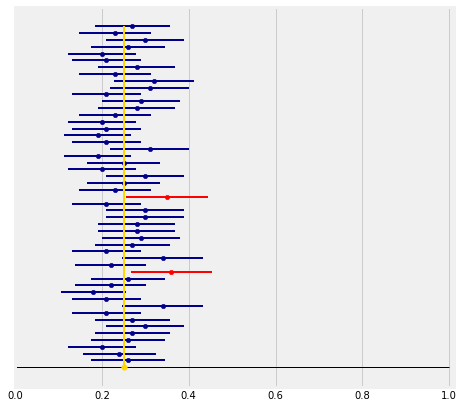

In [7]:
# arguments: sample size, true p, level=, repetitions=

conf_int_p(100, 0.25)

Normal approximate 95 percent confidence intervals for p
based on 50 independent samples of 100 i.i.d. Bernoulli (p) trials


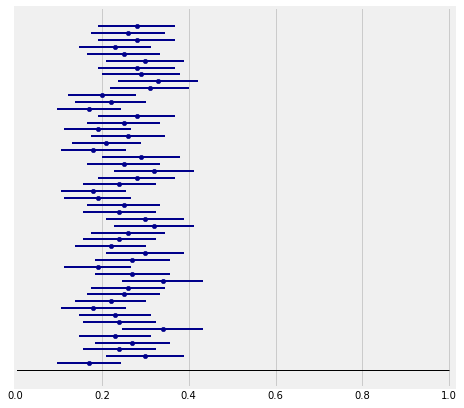

In [8]:
# argument: sample size

closer_to_reality(100)

Normal approximate 95 percent confidence interval for p
based on one sample of 100 i.i.d. Bernoulli (p) trials


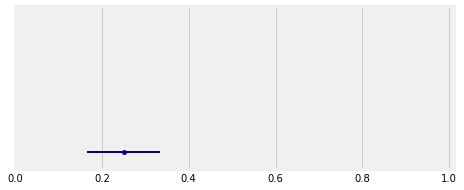

In [9]:
# argument: sample size

reality(100)

## 2. Credible Interval for Random Proportion ##

- $\Theta$ is a random proportion with prior distribution beta $(r, s)$
- Given $\Theta = \theta$, the likelihood of the data $Y$ is given by binomial $(n, \theta)$ probabilities
- Given $Y=y$, the posterior distribution of $\Theta$ is beta $(r+y, s+n-y)$

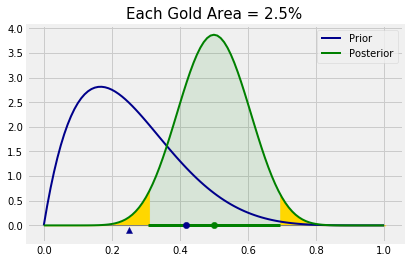

In [10]:
# arguments: r, s, n, level=

bb_credible_int_construction(2, 6, 20)

In reality, what you have are your prior and the data.

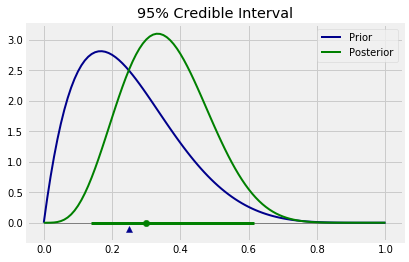

In [12]:
# arguments: r, s, num_successes, n

bb_credible_int(2, 6, 3, 10)

How would you compare two online sellers who don't have much of a track record, if all you know about them are these ratings?

- Seller A: 9 satisfied, 1 unsatisfied
- Seller B: 5 satisfied, 0 unsatisfied

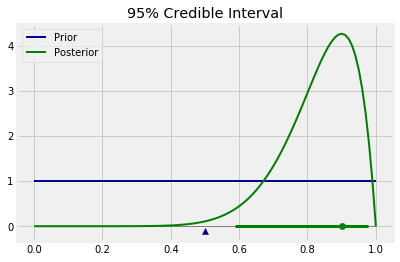

In [13]:
# Seller A

bb_credible_int(1, 1, 9, 10)

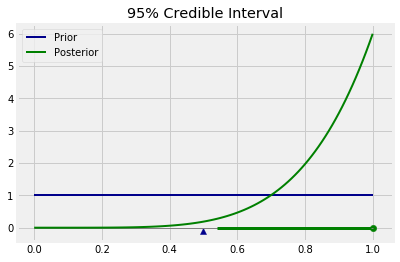

In [14]:
# Seller B

bb_credible_int(1, 1, 5, 5)

Interval A is shorter, but Posterior B has a lot of mass at the right edge where Posterior A is plummeting down.

If $\Theta_A$ and $\Theta_B$ are the random reliabilities of the two sellers then you might want to find $P(\Theta_B > \Theta_A)$. For this you must have a prior on the pair $(\Theta_A, \Theta_B)$. That's a joint distribution on the unit square. It's tempting to make independence assumptions, or conditional independence assumptions given the two data sets, but these have to be made with caution. For example if both sellers were acquiring the item from the same factory then a problem at the factory might affect the reliability of both.

## 3. Definition of Credible Interval ##

Let $0 < \alpha < 0.5$. A $100(1-\alpha)\%$ credible interval for $\Theta$ is an interval $(l(Y), u(Y))$ that satisfies:

- $P(\Theta < l(Y) \mid Y) = \alpha/2$
- $P(\Theta > u(Y) \mid Y) = \alpha/2$

Hence it is also called an *equal tails interval* or ETI, and $P(\Theta \in (l(Y), u(Y)) \mid Y) = 1 - \alpha$.

If you have constructed a 95% credible interval then it is true that there is 95% chance that the parameter lies in the interval, given the data (under the assumptions of the model).

How to compute it:

- If $F$ is the cdf of the posterior then the bounds are $F^{-1}(\alpha/2)$ and $F^{-1}(1-\alpha/2)$. I used: 

lower bound = `stats.beta.ppf(0.025, posterior_r, posterior_s)`

upper bound = `stats.beta.ppf(0.975, posterior_r, posterior_s)`

- If you or your computational system can't calculate $F^{-1}$, you might be able to simulate draws from the posterior and take the middle $100(1-\alpha)\%$ of those.



## 4. Alternative to "Equal Tails" ##

Infinitely many intervals contain 95% of the probability in the posterior distribution.

Assume the posterior density is unimodal. If it is also symmetric, then equal tails is hard to beat.

Even if the posterior is not symmetric, setting the two tails to be equal is a reasonable choice.

Another is an interval of highest posterior density (HPD), also known as a highest density interval or HDI. 

Roughly it's the interval of "most probable" values that have 95% probability in all.

To identify the interval, you have to find a level $p^*$ such that

$$
\int_{\theta: p(\theta \mid y) > p^*} p(\theta \mid y)d\theta ~ = ~ 1 - \alpha
$$

- Advantage of HDI: every $\theta$ that is not in the interval has a lower posterior density than every $\theta$ that is in the interval.

- Advantage of ETI: Easier to calculate.

- Advantage of ETI: Works well if you want to estimate an increasing function of the parameter, e.g. the log odds $\log(p/(1-p))$ instead of $p$. Just apply the increasing function to the two ends of the ETI.

If the posterior density is unimodal and not far from symmetric, then the two intervals are pretty close.

## 5. Definition of Confidence Interval ##

- Fixed parameter $\theta$
- Data: $Y$

A $100(1-\alpha)\%$ confidence interval for $\theta$ is an interval $(l(Y), u(Y))$ that satisfies

$$
P_\theta(\theta \in (l(Y), u(Y))) = 1 - \alpha
$$

E.g. if $Y$ is the mean of an i.i.d. sample from a distribution that has mean $\mu$ and SD $\sigma$, and the sample size $n$ is large, then by the CLT

$$
P_\mu(\mu \in Y \pm 2\sigma/\sqrt{n}) \approx 0.95
$$

so $Y \pm 2\sigma/\sqrt{n}$ is an approximate 95% confidence interval for $\mu$.

If $\sigma$ is unknown, estimate it by the sample SD $\hat{\sigma}$ or $S$; it doesn't make much difference when $n$ is large. Then

$$
P_\mu(\mu \in Y \pm 2\hat{\sigma}/\sqrt{n}) \approx 0.95
$$

and the interval $Y \pm 2\hat{\sigma}/\sqrt{n}$ can be computed from the data.

As in the Bayesian setting, there are infinitely many intervals that satisfy the condition for being a 95% confidence interval. For the same reasons as before, we recommend equal tails.

## 6. Compare and Contrast ##

The **main difference** is in the models and interpretation.

Other points, in no particular order:

- Credible interval can be constructed even if there is just one observation. Depending on the model, there are ways to make confidence intervals based on small samples. Note that the population mean/proportion intervals discussed in this lecture have all been based on the CLT.

- The statistic used to create a confidence interval is often the MLE of the parameter. Likelihood is a bridge between the two worlds, as the posterior distribution requires it along with the prior.

- If the prior is flat, then the posterior is proportional to the likelihood. If in addition the sample is large then the posterior is often dominated by the data, and numerically the two intervals can be rather similar.